# Bibliotecas

In [48]:
import numpy  as np
import pandas as pd
import string
import bt
import warnings
%matplotlib notebook 
import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
from sklearn import preprocessing
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import math
from pandas.plotting import scatter_matrix
from datetime import date
import seaborn as sns
pandas.options.display.max_rows
from pandas_datareader import data
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from statsmodels import regression
from matplotlib import style
warnings.filterwarnings('ignore')
%matplotlib inline
# prettify the figures
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='Times New Roman', size=15)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True
kw_save = dict(bbox_iches='tight', transparent=True)

# Análise de Retornos

In [2]:
# Listas de Small Caps e IBRX50

small_caps = ['AMAR3.SA', 'ANIM3.SA', 'ARZZ3.SA', 'BEEF3.SA', 'BIDI4.SA', 'BKBR3.SA', 'BRAP4.SA', 'BRML3.SA', 'BRPR3.SA', 
              'BRSR6.SA', 'CAML3.SA', 'CEAB3.SA', 'CESP6.SA',
              'CNTO3.SA', 'COGN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DIRR3.SA', 'DMMO3.SA', 'DTEX3.SA', 
              'ECOR3.SA', 'EMBR3.SA', 'ENAT3.SA', 'ENBR3.SA', 'ENEV3.SA', 'EVEN3.SA', 'EGIE3.SA', 'EZTC3.SA', 
              'FLRY3.SA', 'GFSA3.SA', 'GOAU4.SA', 'GOLL4.SA', 'GRND3.SA', 'GUAR3.SA', 'HGTX3.SA', 'IGTA3.SA', 'JHSF3.SA', 
              'JSLG3.SA', 'LCAM3.SA', 'LEVE3.SA', 'LIGT3.SA', 'LINX3.SA', 'LOGG3.SA', 'LOGN3.SA',
              'MDIA3.SA', 'MEAL3.SA', 'MILS3.SA', 'MOVI3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MYPK3.SA', 'ODPV3.SA', 'OMGE3.SA', 
              'PARD3.SA', 'POMO4.SA', 'PRIO3.SA', 'QUAL3.SA', 'RAPT4.SA', 'RLOG3.SA', 'SAPR4.SA',
              'SEER3.SA', 'SLCE3.SA', 'SMLS3.SA', 'SMTO3.SA', 'SQIA3.SA', 'STBP3.SA', 'TCSA3.SA', 'TEND3.SA', 'TGMA3.SA', 
              'TRIS3.SA', 'TUPY3.SA', 'UNIP6.SA', 'USIM5.SA', 'VIVA3.SA', 'VLID3.SA', 'VVAR3.SA', 'WIZS3.SA', '^BVSP']

ibrx50     = ['BBAS3.SA', 'B3SA3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BPAC11.SA', 'BRDT3.SA', 'BRFS3.SA' , 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 
              'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CSNA3.SA', 'CYRE3.SA',
              'ELET3.SA', 'EQTL3.SA', 'GGBR4.SA', 'GNDI3.SA', 'HAPV3.SA', 'ITSA4.SA', 'JBSS3.SA', 'LAME4.SA', 'LREN3.SA', 
              'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA',   'PETR3.SA', 
              'RAIL3.SA', 'RENT3.SA', 'SBSP3.SA', 'SULA11.SA', 'SUZB3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'WEGE3.SA', 
              'YDUQ3.SA', '^BVSP', 'ENAT3.SA', 'RADL3.SA']

tickers    = ibrx50 + small_caps

In [3]:
stock_data = yf.download(tickers=tickers, start='2019-01-01')['Close']
stock_data.ffill(inplace=True)
stock_returns = stock_data.pct_change()

[*********************100%***********************]  116 of 116 completed


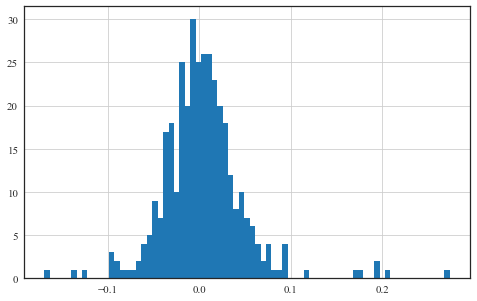

In [4]:
# Distribuição dos Retornos

plt.hist(stock_returns['BTOW3.SA'].dropna(), bins=75, density=False)
plt.show()

In [5]:
# Retorno Anualizado

annual_return = ((1+np.mean(stock_returns['BTOW3.SA']))**252)-1

In [6]:
# Desvio Padrão do Retorno Diario
std        = np.std(stock_returns['BTOW3.SA'])
# Variancia Diaria
variance   = np.std(stock_returns['BTOW3.SA']) ** 2
# Volatilidade Anual
a_volatility = np.std(stock_returns['BTOW3.SA']) * np.sqrt(252)
# Volatilidade mensal
m_volatility = np.std(stock_returns['BTOW3.SA']) * np.sqrt(21)

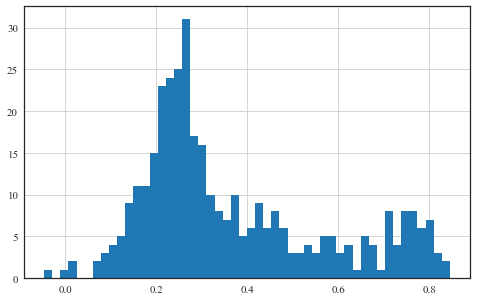

In [7]:
# Retorno Logaritimico

log_returns = np.log(stock_data['BTOW3.SA']).shift(-1) - np.log(stock_data['MGLU3.SA'])
log_returns.hist(bins=50)

In [8]:
# Media Retornos

mu              = log_returns.mean()
sigma           = log_returns.std(ddof=1)
denStock        = pd.DataFrame()
denStock['x']   = np.arange(-0.1,0.1,0.001)
denStock['pdf'] = norm.pdf(denStock['x'],mu,sigma) 

print(mu, sigma)

0.3671245909768405 0.2030902097936489


In [9]:
# Anualizando dados

mu220    = 220*mu
sigma220 = 220**0.5*sigma

print('Probabilidade de cair 40% em 220 dias é: ',
      norm.cdf(-0.4, mu220, sigma220))

Probabilidade de cair 40% em 220 dias é:  3.2468455818130254e-160


# VaR
norm.ppf(0.05,mu,sigma)

In [11]:
# Interavalo Confiança

z_left      = norm.ppf(0.1)
z_right     = norm.ppf(0.9)
sample_mean = log_returns.mean()
sample_std  = log_returns.std(ddof=1)/(stock_data['MGLU3.SA'].shape[0])**0.5
interval_l  = sample_mean+z_left +sample_std
interval_r  = sample_mean+z_right+sample_std
print('Media: ', sample_mean)
print('********************')
print(interval_l,interval_r)

Media:  0.3671245909768405
********************
-0.9037675029955652 1.6593356280936356


In [12]:
stock_data

,AMAR3.SA,ANIM3.SA,ARZZ3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BIDI4.SA,BKBR3.SA,...,UNIP6.SA,USIM5.SA,VALE3.SA,VIVA3.SA,VLID3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.54,18.010000,55.310001,27.790001,48.599998,33.658298,28.320000,4.99514,6.51138,20.650000,...,32.357101,9.76,51.090000,NaN,18.510000,4.38,17.980000,7.20,24.850000,91012.000000
2019-01-03,5.61,18.799999,55.580002,29.000000,48.799999,33.983299,28.629999,5.11313,6.32327,21.209999,...,31.971399,9.55,49.000000,NaN,17.740000,4.31,18.389999,7.25,24.830000,91564.000000
2019-01-04,5.67,18.750000,53.330002,27.950001,48.799999,33.716702,28.350000,5.30979,6.24571,21.150000,...,31.962799,10.11,52.189999,NaN,17.360001,4.27,18.600000,7.15,25.209999,91841.000000
2019-01-07,5.70,18.889999,52.529999,27.799999,48.480000,34.116699,27.930000,5.28029,6.27046,21.000000,...,31.885700,10.13,51.910000,NaN,17.170000,4.24,18.309999,7.09,24.709999,91699.000000
2019-01-08,5.54,19.490000,54.049999,27.879999,47.930000,34.325001,27.520000,5.22129,6.56914,21.049999,...,32.785702,9.77,52.410000,NaN,18.020000,4.04,18.160000,7.15,24.940001,92032.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,8.59,23.500000,43.709999,49.849998,33.349998,21.629999,26.420000,13.07000,11.95000,12.300000,...,24.900000,6.41,53.400002,19.629999,11.510000,14.64,44.250000,11.22,33.430000,92795.000000
2020-06-15,8.53,23.320000,44.279999,49.509998,33.070000,21.150000,26.350000,13.10000,12.11000,11.800000,...,24.250000,6.36,53.880001,20.000000,11.220000,15.62,44.270000,11.16,32.860001,92376.000000
2020-06-16,8.36,23.170000,43.000000,49.500000,33.500000,22.030001,26.150000,13.93000,11.98000,11.920000,...,25.400000,6.55,55.389999,20.350000,10.970000,15.15,44.759998,11.04,32.009998,93531.000000


# Monte Carlo

In [13]:
data = yf.download('MGLU3.SA', start='2020-03-01')['Close']

[*********************100%***********************]  1 of 1 completed


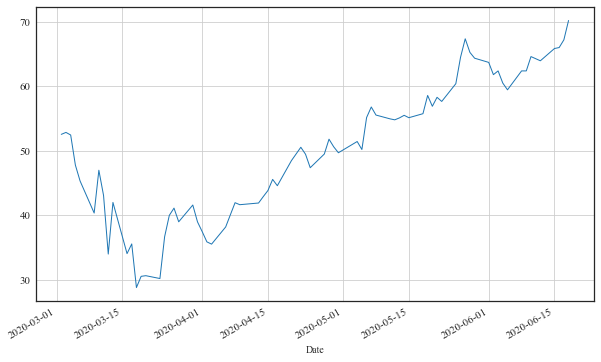

In [14]:
t_intervals = 30 # time steps forecasted into future
iterations = 55 # amount of simulations

#Preparing log returns from data
log_returns = np.log(1 + data.pct_change())

#Plot of asset historical closing price
data.plot(figsize=(10, 6));

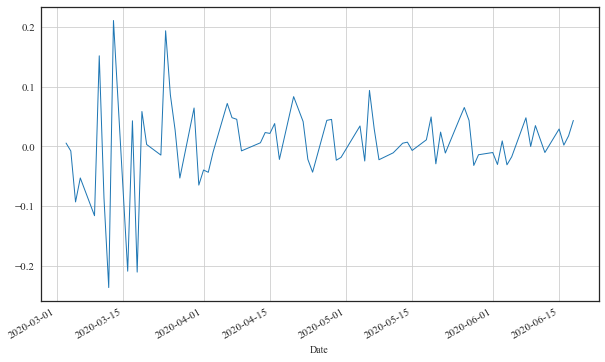

In [15]:
#Plot of log returns
log_returns.plot(figsize = (10, 6))

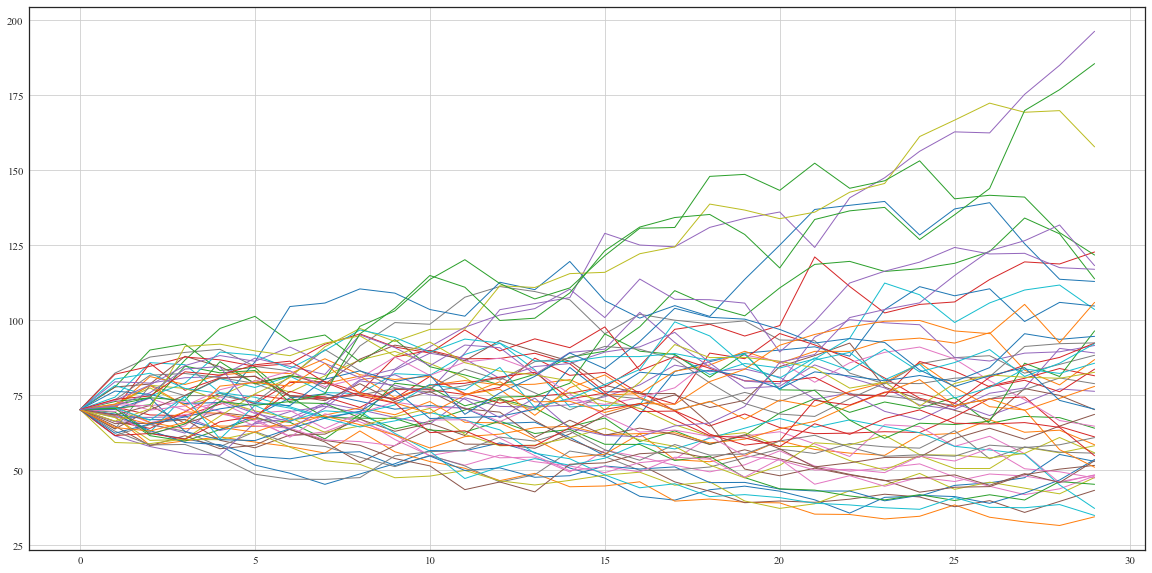

In [16]:
#Setting up drift and random component in relation to asset data
u             = log_returns.mean()
var           = log_returns.var()
drift         = u - (0.5 * var)
stdev         = log_returns.std()
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

#Takes last data point as startpoint point for simulation
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0

#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

#Plot simulations
plt.figure(figsize=(20,10))
plt.plot(price_list);

# Análise de Concorrência

In [17]:
start = datetime.datetime(2019, 1, 1)
end   = datetime.datetime(2020, 6, 12)

df    = web.DataReader("BTOW3.SA", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-05,88.080002,84.300003,88.000000,86.330002,6410100.0,86.330002
2020-06-08,93.000000,86.250000,86.500000,93.000000,5134100.0,93.000000
2020-06-09,94.849998,90.510002,91.139999,94.500000,3235200.0,94.500000
2020-06-10,100.820000,94.360001,94.589996,99.699997,6112000.0,99.699997
2020-06-12,103.389999,97.019997,97.440002,99.470001,6205200.0,99.470001


In [18]:
close_px = df['Adj Close']
mavg     = close_px.rolling(window=100).mean()

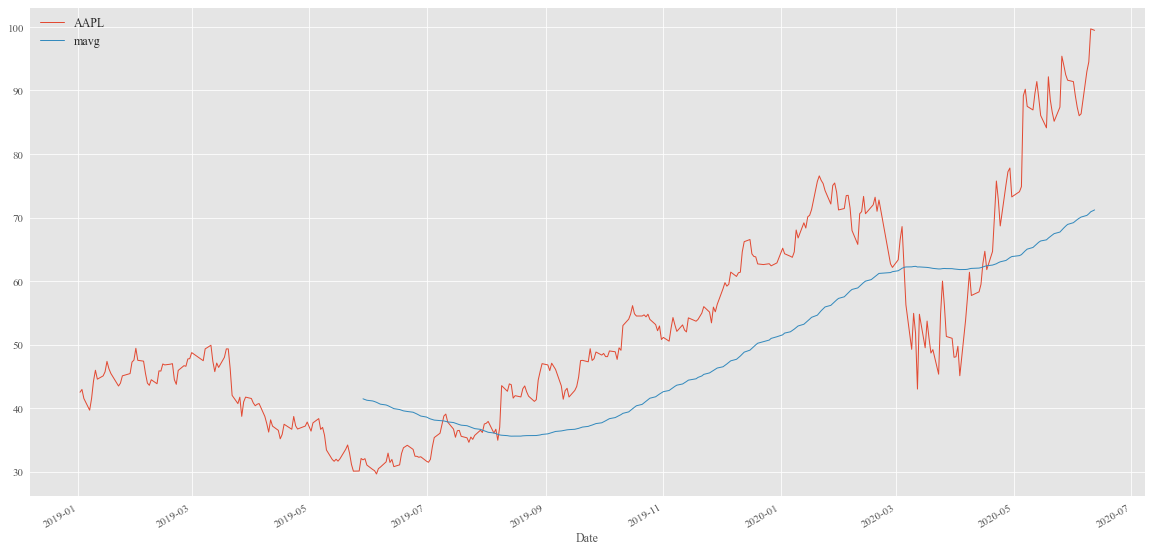

In [20]:
import matplotlib as mpl
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(20, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

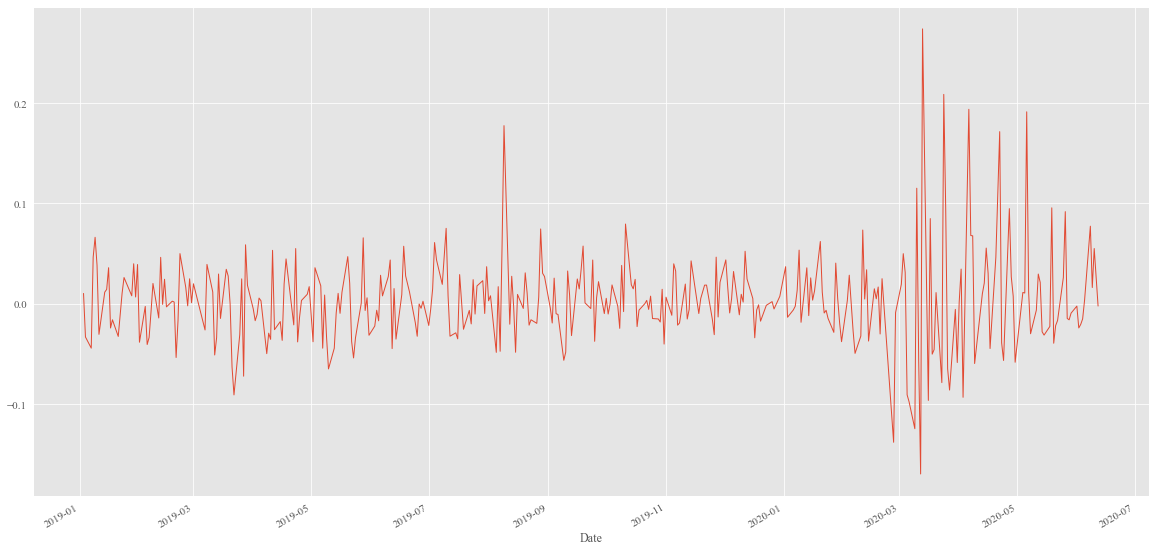

In [21]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [22]:
dfcomp   = web.DataReader(['VVAR3.SA', 'AMAR3.SA', 'MGLU3.SA', 'CNTO3.SA', 'BTOW3.SA', 'LAME4.SA'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()
corr     = retscomp.corr()

In [23]:
retscomp = dfcomp.pct_change()
corr     = retscomp.corr()

Text(0, 0.5, 'RETORNOS BTOW')

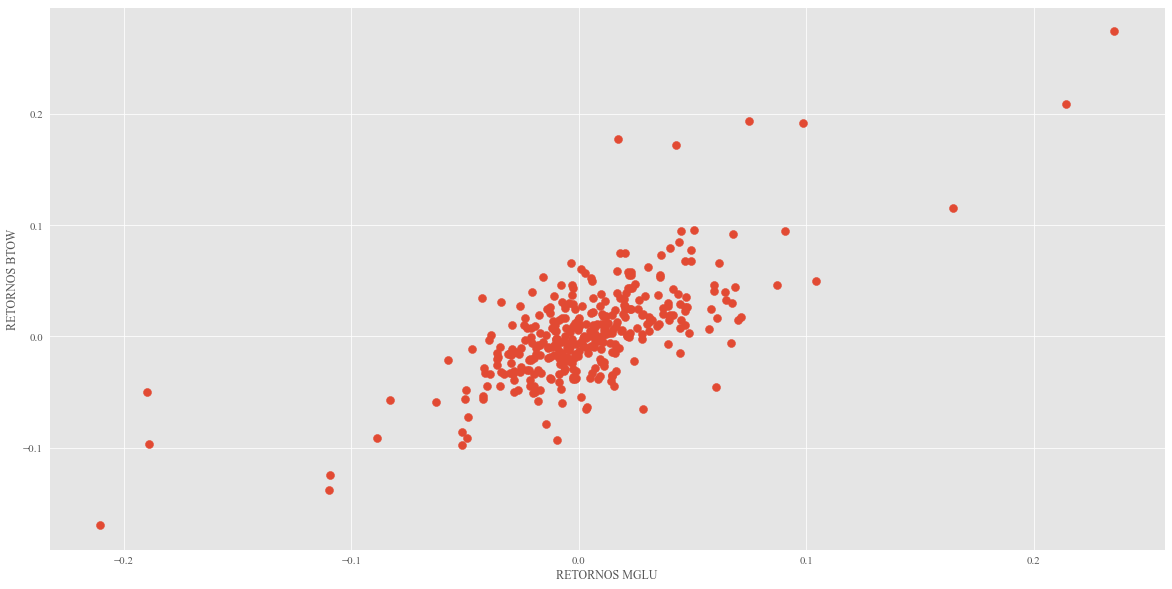

In [24]:
plt.scatter(retscomp['MGLU3.SA'], retscomp['BTOW3.SA'])
plt.xlabel('RETORNOS MGLU')
plt.ylabel('RETORNOS BTOW')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002567A40B4F0>,
      dtype=object)

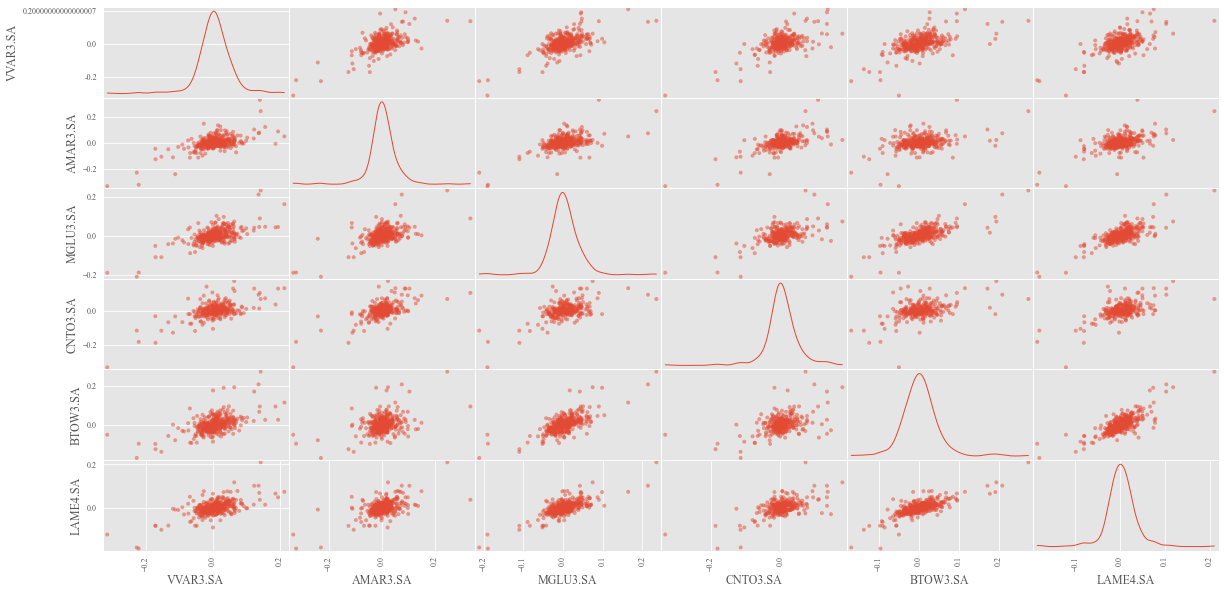

In [25]:
scatter_matrix(retscomp, diagonal='kde')

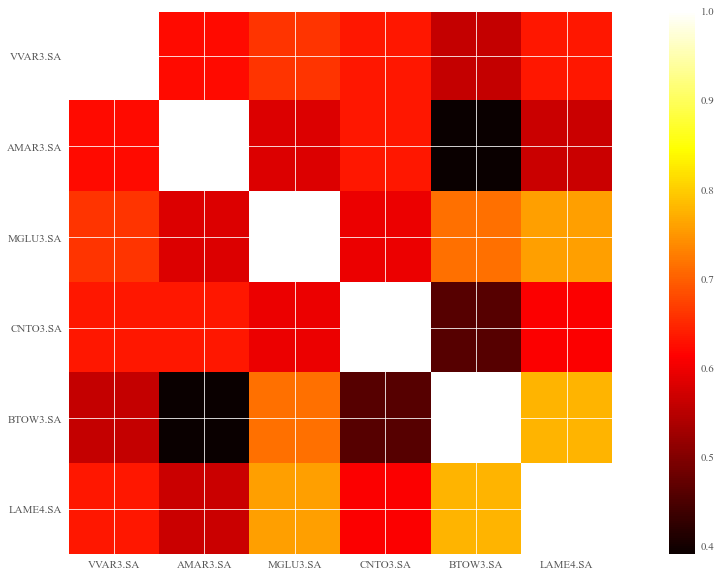

In [26]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

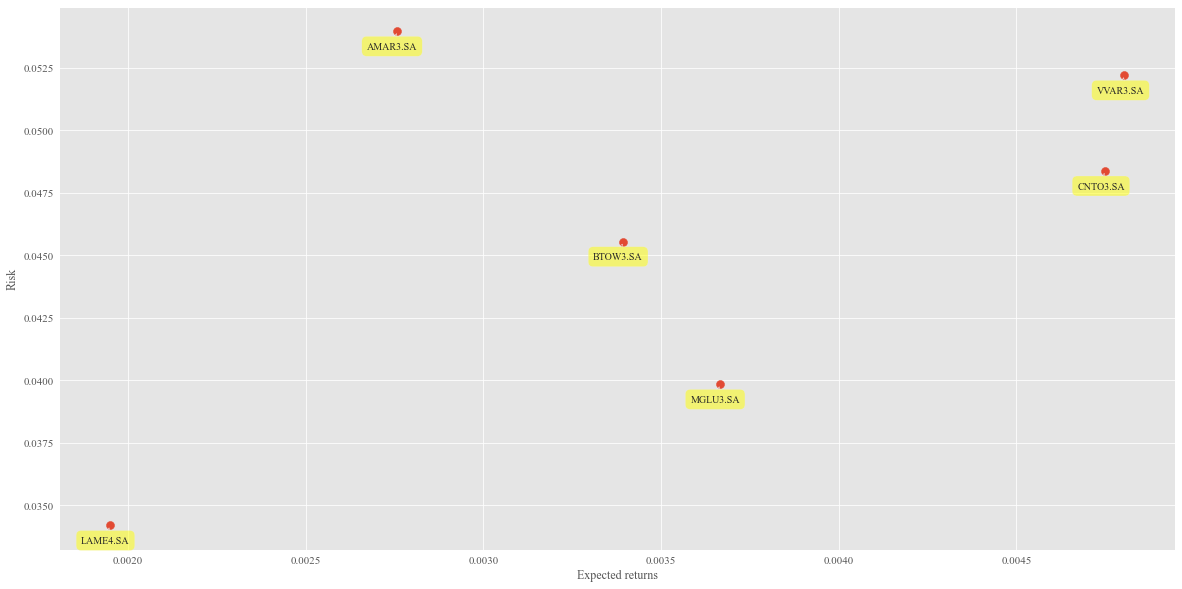

In [27]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [28]:
dfcomp   = web.DataReader(['BBDC4.SA', 'BPAC11.SA', 'ITUB4.SA', 'BBAS3.SA', 'SANB11.SA'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()
corr     = retscomp.corr()

In [29]:
retscomp = dfcomp.pct_change()
corr     = retscomp.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002567B511190>,
      dtype=object)

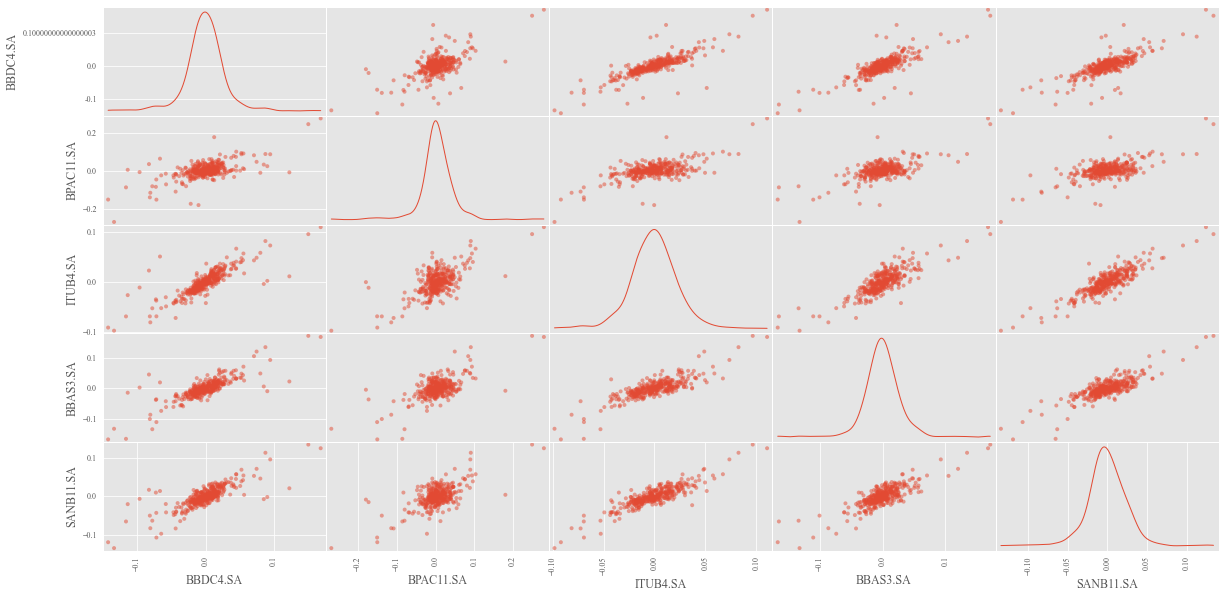

In [30]:
scatter_matrix(retscomp, diagonal='kde')

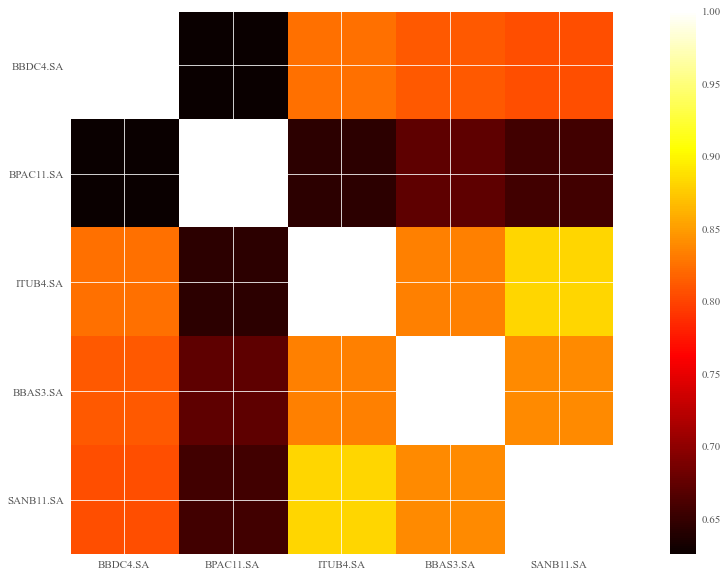

In [31]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

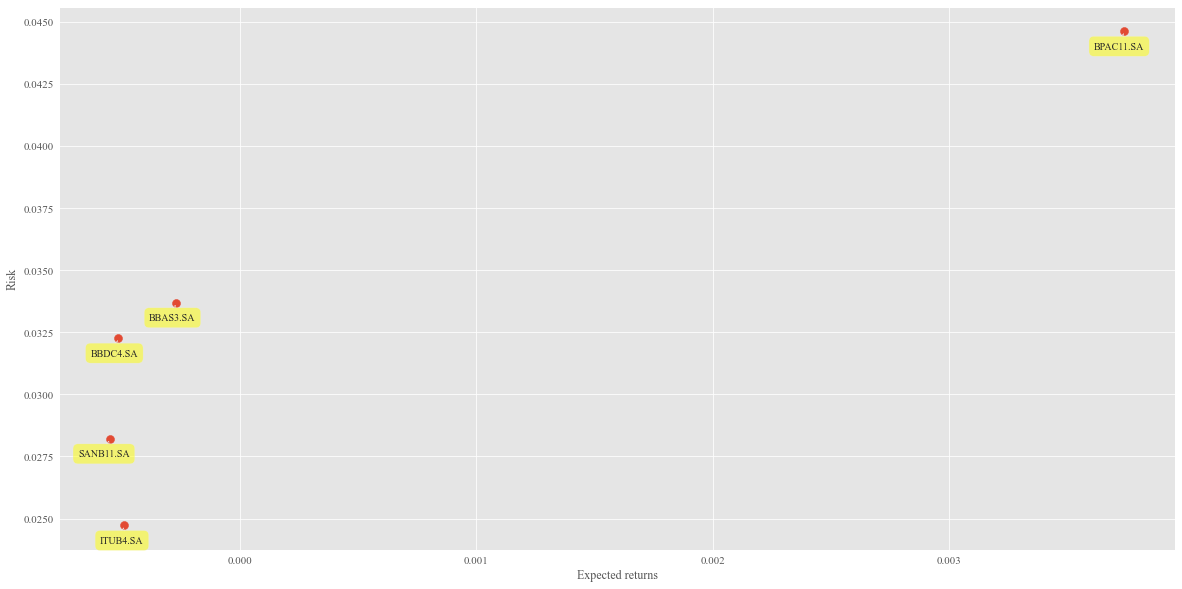

In [32]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# PieChart de Retornos Diários

In [33]:
HDFC_df = yf.download('NTCO3.SA', start='2020-01-01')
HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)
HDFC_df.shape

[*********************100%***********************]  1 of 1 completed


(114, 6)

In [34]:
HDFC_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
HDFC_df.dropna(inplace = True, axis = 0)

In [36]:
HDFC_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [37]:
HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,36,37,34,36,36,8710867
std,7,7,7,7,7,3505289
min,22,24,20,21,21,2545800
25%,30,33,28,31,31,6011300
50%,35,36,34,35,35,8149050
75%,40,41,39,41,41,10710275
max,50,51,49,50,50,20515600


In [38]:
HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100
HDFC_df.head()

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,
2020-01-02,38.88,39.08,37.50,38.33,38.33,10508500,NaN
2020-01-03,38.50,41.00,38.36,41.00,41.00,55883200,6.965823
2020-01-06,41.20,43.33,39.50,40.13,40.13,71292300,-2.121951
2020-01-07,40.20,40.86,39.27,40.78,40.78,23487900,1.619736
2020-01-08,40.80,42.06,40.53,40.99,40.99,15211800,0.514958


In [39]:
HDFC_df.dropna(axis = 0, inplace = True)

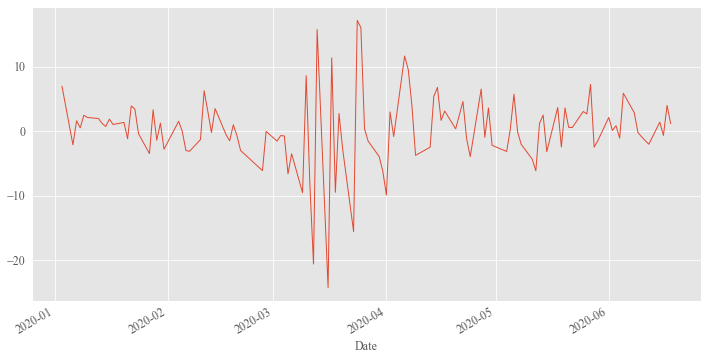

In [40]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

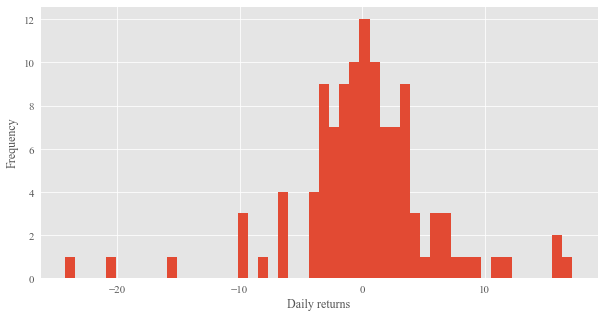

count    113.000000
mean       0.261932
std        5.801523
min      -24.242424
25%       -2.121951
50%        0.348837
75%        2.975420
max       17.176471
Name: Day_Perc_Change, dtype: float64

In [41]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
HDFC_df.Day_Perc_Change.describe()

In [42]:
def trend(x):
  if x > -1 and x <= 1:
    return 'Slight or No change'
  elif x > 1 and x <= 5:
    return 'Positive'
  elif x > -5 and x <= -1:
    return 'Negative'
  elif x > 5:
    return 'Bull run'
  elif x <= -10:
    return 'Bear drop'
HDFC_df['Trend']= np.zeros(HDFC_df['Day_Perc_Change'].count())
HDFC_df['Trend']= HDFC_df['Day_Perc_Change'].apply(lambda x:trend(x))
HDFC_df.head()

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,
2020-01-03,38.5,41.00,38.36,41.00,41.00,55883200,6.965823,Bull run
2020-01-06,41.2,43.33,39.50,40.13,40.13,71292300,-2.121951,Negative
2020-01-07,40.2,40.86,39.27,40.78,40.78,23487900,1.619736,Positive
2020-01-08,40.8,42.06,40.53,40.99,40.99,15211800,0.514958,Slight or No change
2020-01-09,41.5,42.00,40.61,42.00,42.00,13393700,2.464016,Positive


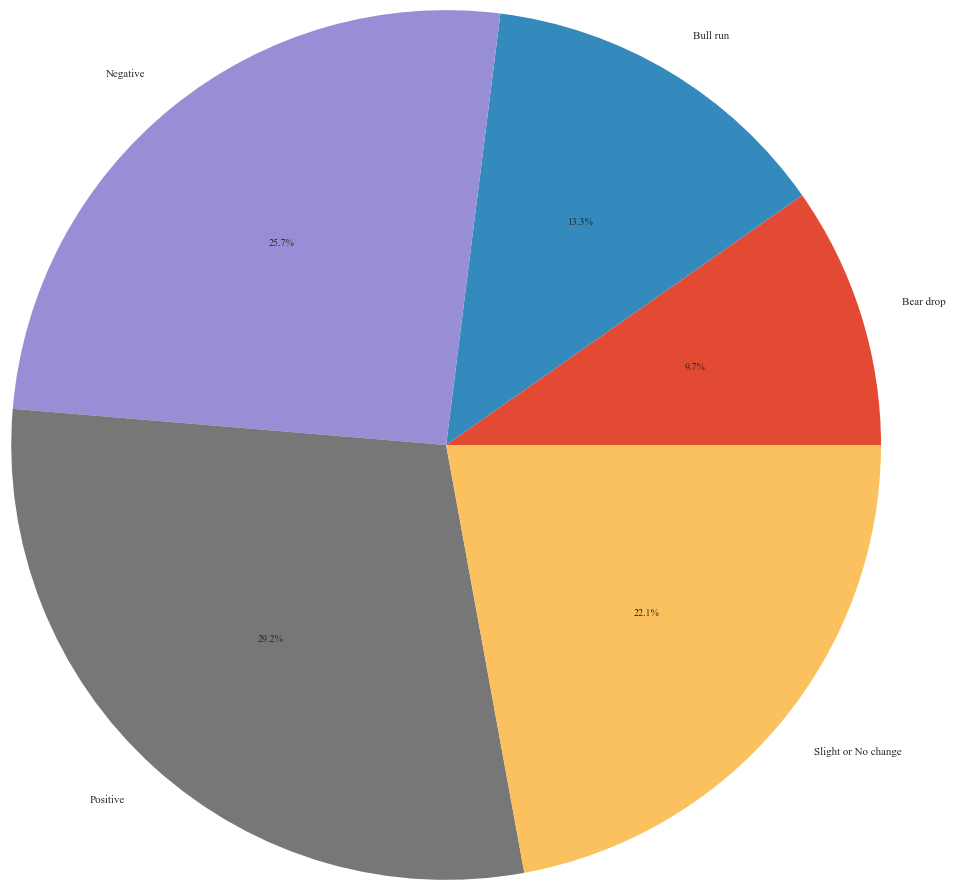

In [43]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label    = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

# Cálculo do Beta

In [44]:
yf.pdr_override()


df1 = pdr.get_data_yahoo("OIBR3.SA", start="2019-01-01")


df2 = pdr.get_data_yahoo("^BVSP", start="2019-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
return_goog = df1.Close.pct_change()[1:]
return_spy = df2.Close.pct_change()[1:]

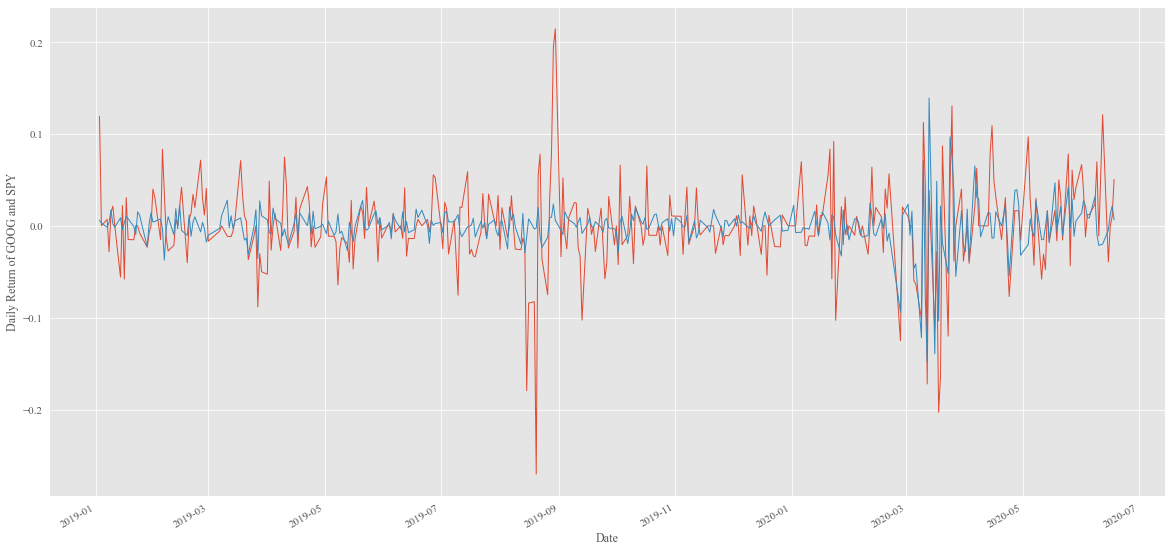

In [46]:
plt.figure(figsize=(20,10))
return_goog.plot()
return_spy.plot()
plt.ylabel("Daily Return of GOOG and SPY")
plt.show()

In [47]:
X = return_spy.values
Y = return_goog.values

In [48]:
def linreg(x,y):


    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
 
    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]


alpha, beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: 0.00027335929373557225
beta: 0.7547802082052466


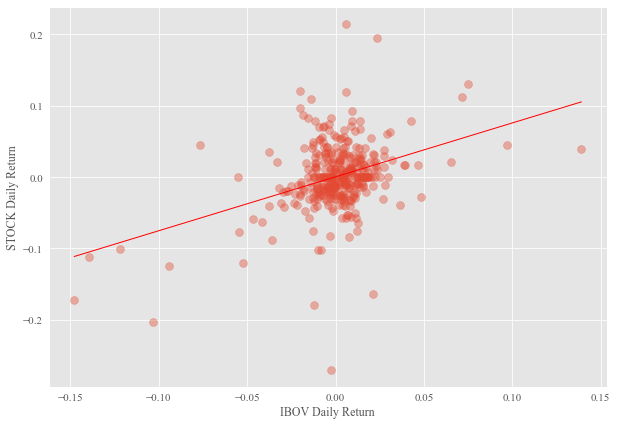

In [49]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha


plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.4) # Plot the raw data
plt.xlabel("IBOV Daily Return")
plt.ylabel("STOCK Daily Return")


plt.plot(X2, Y_hat, 'r', alpha=1)


plt.show()


In [50]:
best_picks = ['ANIM3.SA', 'B3SA3.SA', 'BPAC11.SA', 'BTOW3.SA', 'CESP6.SA', 'CNTO3.SA', 'ECOR3.SA', 'EGIE3.SA',
              'ELET3.SA', 'ENEV3.SA', 'EQTL3.SA' , 'FLRY3.SA', 'GNDI3.SA', 'HAPV3.SA', 'JBSS3.SA', 'JHSF3.SA',
              'LOGG3.SA', 'MGLU3.SA', 'OMGE3.SA' , 'PARD3.SA', 'PRIO3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA',
              'RLOG3.SA', 'SBSP3.SA', 'SMTO3.SA' , 'TEND3.SA', 'VVAR3.SA', 'WEGE3.SA', 'WIZS3.SA']

In [51]:
def linreg(x,y):


    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
 
    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

In [52]:
def beta(str):
    df1 = pdr.get_data_yahoo(str, start="2019-01-01")
    df2 = pdr.get_data_yahoo("^BVSP", start="2019-01-01")
    return_goog = df1.Close.pct_change()[1:]
    return_spy  = df2.Close.pct_change()[1:]
    alpha, beta = linreg(X,Y)
    return beta

In [53]:
beta('BTOW3.SA')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.7547802082052466

# Biblioteca de BackTest

In [54]:
data_inicio = '2020-03-01'
data_fim    = '2020-06-15'

In [55]:
tickers_carteira = ['RADL3.SA', 'BTOW3.SA']

In [56]:
carteira = yf.download(tickers_carteira, start=data_inicio, end=data_fim)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [57]:
rebalanceamento = bt.Strategy('rebalanceamento', 
                 [bt.algos.RunMonthly(run_on_end_of_period=True),
                  bt.algos.SelectAll(),
                  bt.algos.WeighEqually(),
                  bt.algos.Rebalance()])

In [58]:
buy_hold = bt.Strategy('Buy&Hold', 
                   [ bt.algos.RunOnce(),
                     bt.algos.SelectAll(),
                     bt.algos.WeighEqually(),
                     bt.algos.Rebalance()]
                    )

In [59]:
bt1 = bt.Backtest(rebalanceamento, carteira)
bt2 = bt.Backtest(buy_hold, carteira)

In [60]:
resultados = bt.run(bt1, bt2)

rebalanceamento
0% [############################# ] 100% | ETA: 00:00:00Buy&Hold
0% [############################# ] 100% | ETA: 00:00:00

In [61]:
resultados.display()

Stat                 rebalanceamento    Buy&Hold
-------------------  -----------------  ----------
Start                2020-03-01         2020-03-01
End                  2020-06-12         2020-06-12
Risk-free rate       0.00%              0.00%

Total Return         19.92%             22.06%
Daily Sharpe         1.21               1.28
Daily Sortino        2.12               2.28
CAGR                 90.46%             102.76%
Max Drawdown         -29.23%            -29.24%
Calmar Ratio         3.10               3.51

MTD                  3.76%              4.93%
3m                   61.68%             64.55%
6m                   -                  -
YTD                  19.92%             22.06%
1Y                   -                  -
3Y (ann.)            -                  -
5Y (ann.)            -                  -
10Y (ann.)           -                  -
Since Incep. (ann.)  90.46%             102.76%

Daily Sharpe         1.21               1.28
Daily Sortino        2.12   

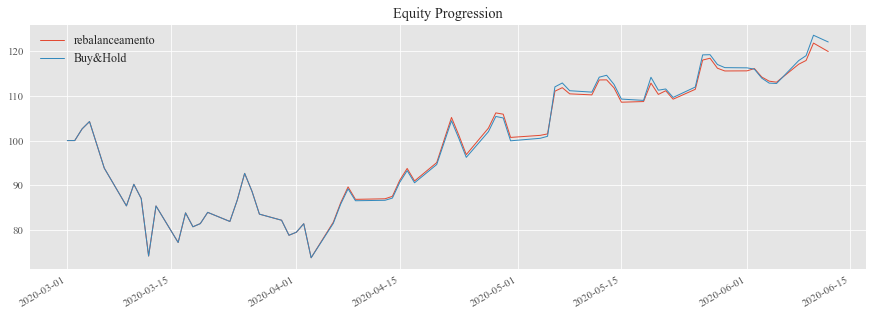

In [62]:
resultados.plot();

In [63]:
resultados.get_transactions()

price  quantity
Date       Security                      
2020-03-02 BTOW3.SA   63.349998    7892.0
           RADL3.SA  124.334068    4021.0
2020-03-31 BTOW3.SA   48.000000     318.0
           RADL3.SA  101.788383    -150.0
2020-04-30 BTOW3.SA   73.250000   -1336.0
           RADL3.SA  104.779999     934.0
2020-05-29 BTOW3.SA   91.620003    -567.0
           RADL3.SA  109.440002     475.0

In [64]:
resultados.get_security_weights()

,BTOW3.SA,RADL3.SA
2020-03-01,0.000000,0.000000
2020-03-02,0.499958,0.499947
2020-03-03,0.511484,0.488424
2020-03-04,0.519119,0.480790
2020-03-05,0.496704,0.503201
...,...,...
2020-06-05,0.481578,0.518369
2020-06-08,0.500964,0.498984
2020-06-09,0.505416,0.494532
2020-06-10,0.516213,0.483737


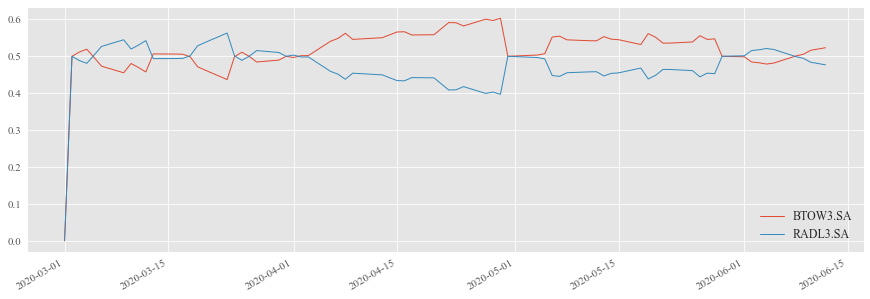

In [65]:
resultados.plot_security_weights()

# Calcular correlaçao ivvb11 bovespa

In [166]:
ivvb11_data = pd.read_excel('ivvb11.xlsx')

In [167]:
ivvb11_data['Fechamento']

0       182.86
1       183.45
2       182.00
3       181.24
4       177.99
         ...  
1520     41.98
1521     41.92
1522     42.11
1523     42.30
1524     41.96
Name: Fechamento, Length: 1525, dtype: float64

In [168]:
close_ivvb11 = a['Fechamento'].iloc[::-1].astype('float64')

In [169]:
returns      = np.log(close_ivvb11).shift(-1) - np.log(close_ivvb11)
total_return = ((1+np.mean(returns))**len(close_ivvb11))-1

In [171]:
total_return

3.359071305482421

In [192]:
ibov_data = yf.download('^BVSP', start='2014-05-07', end='2020-07-07')['Close']

[*********************100%***********************]  1 of 1 completed


In [193]:
ibov_returns      = np.log(ibov_data).shift(-1) - np.log(ibov_data)
ibov_total_return = ((1+np.mean(ibov_returns))**len(ibov_data))-1

In [194]:
ibov_total_return

0.8308767674483151

In [208]:
returns.to_excel('ivvb11returns.xlsx')

In [214]:
returns

1524    0.008070
1523   -0.004502
1522   -0.004522
1521    0.001430
1520   -0.000238
          ...   
4       0.018095
3       0.004185
2       0.007935
1      -0.003221
0            NaN
Name: Fechamento, Length: 1525, dtype: float64

In [215]:
ibov_returns

Date
2014-05-07   -0.011742
2014-05-08   -0.006046
2014-05-09    0.017788
2014-05-12   -0.002705
2014-05-13    0.009343
                ...   
2020-06-30    0.011994
2020-07-01    0.000333
2020-07-02    0.005492
2020-07-03    0.022198
2020-07-06         NaN
Name: Close, Length: 1525, dtype: float64

In [211]:
a = pd.read_excel('ibovreturns (1).xlsx')

In [212]:
a

,Date,IBOV,IVVB11
0,2014-05-07,-0.011742,0.008070
1,2014-05-08,-0.006046,-0.004502
2,2014-05-09,0.017788,-0.004522
3,2014-05-12,-0.002705,0.001430
4,2014-05-13,0.009343,-0.000238
...,...,...,...
1520,2020-06-30,0.011994,0.018095
1521,2020-07-01,0.000333,0.004185
1522,2020-07-02,0.005492,0.007935
1523,2020-07-03,0.022198,-0.003221


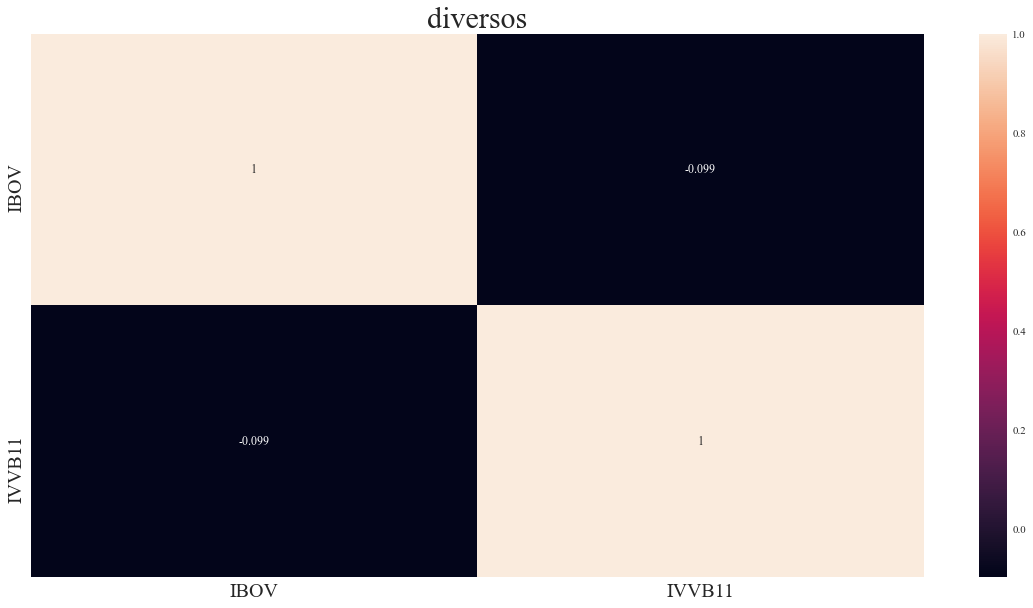

In [213]:
plt.subplots(figsize=(20,10))
plt.title('diversos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(a.corr(), annot=True)